In [1]:
import pandas as pd

df = pd.read_csv("wandb_export_2023-08-29T10_11_57.341+02_00.csv")
df

,train/epoch,deberta-v3-data-mix-1-eval-kaggle-all-folds-grad-accum-128-ACTUAL - _step,deberta-v3-data-mix-1-eval-kaggle-all-folds-grad-accum-128-ACTUAL - _step__MIN,deberta-v3-data-mix-1-eval-kaggle-all-folds-grad-accum-128-ACTUAL - _step__MAX,deberta-v3-data-mix-1-eval-kaggle-all-folds-grad-accum-128-ACTUAL - eval/map3,deberta-v3-data-mix-1-eval-kaggle-all-folds-grad-accum-128-ACTUAL - eval/map3__MIN,deberta-v3-data-mix-1-eval-kaggle-all-folds-grad-accum-128-ACTUAL - eval/map3__MAX,deberta-wiki-sci-map-vs-dataset-size-results-dataset-all - _step,deberta-wiki-sci-map-vs-dataset-size-results-dataset-all - _step__MIN,deberta-wiki-sci-map-vs-dataset-size-results-dataset-all - _step__MAX,...,deberta-wiki-sci-map-vs-dataset-size-results-dataset-1k - _step__MAX,deberta-wiki-sci-map-vs-dataset-size-results-dataset-1k - eval/map3,deberta-wiki-sci-map-vs-dataset-size-results-dataset-1k - eval/map3__MIN,deberta-wiki-sci-map-vs-dataset-size-results-dataset-1k - eval/map3__MAX,deberta-wiki-sci-map-vs-dataset-size-results-dataset-128 - _step,deberta-wiki-sci-map-vs-dataset-size-results-dataset-128 - _step__MIN,deberta-wiki-sci-map-vs-dataset-size-results-dataset-128 - _step__MAX,deberta-wiki-sci-map-vs-dataset-size-results-dataset-128 - eval/map3,deberta-wiki-sci-map-vs-dataset-size-results-dataset-128 - eval/map3__MIN,deberta-wiki-sci-map-vs-dataset-size-results-dataset-128 - eval/map3__MAX
0,0.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.271667,0.271667,0.271667,NaN,NaN,NaN,NaN,NaN,NaN
1,1.00,0.0,0.0,0.0,0.695833,0.695833,0.695833,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.252500,0.252500,0.252500
2,2.00,1.0,1.0,1.0,0.819167,0.819167,0.819167,2.0,2.0,2.0,...,1.0,0.477500,0.477500,0.477500,1.0,1.0,1.0,0.260000,0.260000,0.260000
3,2.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,0.607500,0.607500,0.607500,NaN,NaN,NaN,NaN,NaN,NaN
4,3.00,2.0,2.0,2.0,0.836667,0.836667,0.836667,3.0,3.0,3.0,...,NaN,NaN,NaN,NaN,2.0,2.0,2.0,0.280000,0.280000,0.280000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,60.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,59.0,59.0,59.0,0.735000,0.735000,0.735000
80,61.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,60.0,60.0,60.0,0.692500,0.692500,0.692500
81,62.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,61.0,61.0,61.0,0.710833,0.710833,0.710833
82,63.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,63.0,63.0,63.0,0.710000,0.710000,0.710000


In [2]:
# take only columns that contain "eval/map3"
df = df.loc[:, df.columns.str.contains("eval/map3")]
# don't take columns that have MIN or MAX in name
df = df.loc[:, ~df.columns.str.contains("MIN")]
df = df.loc[:, ~df.columns.str.contains("MAX")]
df

,deberta-v3-data-mix-1-eval-kaggle-all-folds-grad-accum-128-ACTUAL - eval/map3,deberta-wiki-sci-map-vs-dataset-size-results-dataset-all - eval/map3,deberta-wiki-sci-map-vs-dataset-size-results-dataset-2k - eval/map3,deberta-wiki-sci-map-vs-dataset-size-results-dataset-1k - eval/map3,deberta-wiki-sci-map-vs-dataset-size-results-dataset-128 - eval/map3
0,NaN,NaN,NaN,0.271667,NaN
1,0.695833,0.689167,0.401667,NaN,0.252500
2,0.819167,0.789167,0.664167,0.477500,0.260000
3,NaN,NaN,NaN,0.607500,NaN
4,0.836667,0.796667,0.722500,NaN,0.280000
...,...,...,...,...,...
79,NaN,NaN,NaN,NaN,0.735000
80,NaN,NaN,NaN,NaN,0.692500
81,NaN,NaN,NaN,NaN,0.710833
82,NaN,NaN,NaN,NaN,0.710000


In [3]:
# for each column, take top 5 values and average them
df = df.apply(lambda x: x.sort_values(ascending=False).head(5).mean())

# remove " - eval/map3" from names
df.index = df.index.str.replace(" - eval/map3", "")

# replace "dataset-all" with 5000, dataset-2k with 2000, dataset-1k with 1000 and dataset-128 with 128
df.index = df.index.str.replace("deberta-v3-data-mix-1-eval-kaggle-all-folds-grad-accum-128-ACTUAL", "20000")
df.index = df.index.str.replace("deberta-wiki-sci-map-vs-dataset-size-results-dataset-all", "5000")
df.index = df.index.str.replace("deberta-wiki-sci-map-vs-dataset-size-results-dataset-2k", "2000")
df.index = df.index.str.replace("deberta-wiki-sci-map-vs-dataset-size-results-dataset-1k", "1000")
df.index = df.index.str.replace("deberta-wiki-sci-map-vs-dataset-size-results-dataset-128", "128")


df


20000    0.850167
5000     0.801833
2000     0.787333
1000     0.778000
128      0.742500
dtype: float64

In [4]:
df.index

Index(['20000', '5000', '2000', '1000', '128'], dtype='object')

In [5]:
df_sub = pd.DataFrame({
    'n_data': [5000, 20000],
    'public_lb': [0.717, 0.738],
})
df_sub

,n_data,public_lb
0,5000,0.717
1,20000,0.738


In [6]:
df_sentence_context = pd.DataFrame({
    'n_data': [5000, 30_000, 60_000],
    'local_cv': [0.84, 0.87, 0.9],
})
df_sentence_context

,n_data,local_cv
0,5000,0.84
1,30000,0.87
2,60000,0.90


In [12]:
(0.9 - 0.84) / (60_000 - 5000) * (100_000 - 5000) + 0.84

0.9436363636363637

In [7]:
df_sentence_context_public = pd.DataFrame({
    'n_data': [5000, 30_000],
    'public_cv': [0.697, 0.8],
})
df_sentence_context_public

,n_data,public_cv
0,5000,0.697
1,30000,0.800


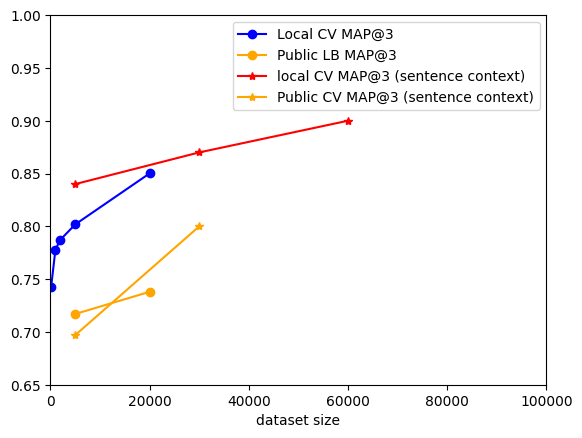

In [11]:

# plot df
import matplotlib.pyplot as plt

# # df["50000"] = 0.9
# # df["80000"] = 0.95
# df["30000"] = 0.87
# df["60000"] = 0.9

# convert index to int
df.index = df.index.astype(int)

# sort df by index
df = df.sort_index()


plt.plot(df.index.astype(int), df.values, marker='o', label="Local CV MAP@3", color='blue')

# plot df_sub
plt.plot(df_sub["n_data"], df_sub["public_lb"], marker='o', label="Public LB MAP@3", color='orange')


plt.plot(df_sentence_context["n_data"], df_sentence_context["local_cv"], marker='*', label="local CV MAP@3 (sentence context)", color='red')
plt.plot(df_sentence_context_public["n_data"], df_sentence_context_public["public_cv"], marker='*', label="Public CV MAP@3 (sentence context)", color='orange')

plt.xlabel('dataset size')


plt.ylim(0.65, 1)
plt.xlim(0, 100_000)

# put legend outside of plot
plt.legend()

$30 for 5k dataset

for 80k dataset it is 80/5*30 = $480.